In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Kruskal's Algorithm for Computing the Minimum Spanning Tree

In our implementation of [Kruskal's algorithm](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm) for finding the 
*minimum spanning tree* we use the *union-find* data structure that we have defined previously.

In [2]:
%run Union-Find-OO.ipynb

Furthermore, we need a priority queue. The module `heapq` implements a priority queue.  The part
of the API from this module that we utilize is the following:
- `H.heappush(x)` pushes `x` onto the heap `H`,
- `H.heappop()`   removes the smallest element from the heap `H` and returns this element,
- `H = []`        creates an empty heap.

In [3]:
import heapq as hq

The function $\texttt{mst}(V, E)$ takes a set of *nodes* $V$ and a set of *weighted edges* $E$ to compute a minimum spanning tree.  It is assumed that the pair $(V, E)$ represents a *weighted graph* $G$ that is *connected*.  The weighted edges in the set $E$ have the form
$$ \bigl\langle w, \langle x, y\rangle\bigr\rangle.  $$
Here, $x$ and $y$ are nodes from the set $V$, while $w$ is the cost of the edge $\{x,y\}$.  

The function call `mst(V, E)` returns a set of weighted edges that define a [minimum spanning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree)
of the weighted graph $G$. The function `mst` does **not** check whether $G$ is connected.

In [4]:
def mst(V, E):
    Nodes = { x: Node(x) for x in V }
    MST = set()         # minimum spanning tree, represented as set of weighted edges
    H   = []            # empty priority queue for weighted edges
    for edge in E:
        hq.heappush(H, edge)
    while True:
        if H == []:
            return None # the graph is not connected
        w, (x, y) = hq.heappop(H)
        root_x = Node[x].find()
        root_y = Node[y].find()
        if root_x != root_y:
            MST.add((w, (x, y)))
            union(Node[x], Node[y])
            if len(MST) == len(V) - 1:
                return MST

The implementation of `mst` that is given below traces its computation via `graphviz`.

In [5]:
def mst(V, E):
    display(toDot(E)) # display the given graph
    Nodes = { x: Node(x) for x in V }
    MST   = set()         # minimum spanning tree, represented as set of weighted edges
    H     = []            # empty priority queue for weighted edges
    for edge in E:
        hq.heappush(H, edge)
    while True:
        if H == []:
            return None # the graph is not connected
        w, (x, y) = hq.heappop(H)
        print(f'testing {x} - {y}, weight {w}')
        root_x = Nodes[x].find()
        root_y = Nodes[y].find()
        if root_x != root_y:
            print(f'connect {x} - {y}')
            MST.add((w, (x, y)))
            union(Nodes[x], Nodes[y])
            display(toDot(E, MST))
            print('_' * 120)
            if len(MST) == len(V) - 1:
                return MST

In [6]:
import graphviz as gv

Given a set $E$ of weighted edges, the function $\texttt{toDot}$ transforms this set into a dot structure that can be displayed as a graph.  The edges that are present in the set $H$ are assumed to be the edges that are part of the minimum spanning tree and therefore are highlighted.

In [7]:
def toDot(E, H=set()):
    V = set()
    for (_, (x, y)) in E:
        V.add(x)
        V.add(y)
    dot = gv.Graph()
    dot.attr(rankdir='LR')
    for x in V:
        dot.node(str(x))
    for (w, (x, y)) in E:
        if (w, (x, y)) in H:
            dot.edge(str(x), str(y), label=str(w), color='blue', penwidth='2')
        else:
            dot.edge(str(x), str(y), label=str(w), style='dashed')
    return dot

The file `tiny.txt` contains the description of a weighted graph.  Every line in this file has the form:
```
x y w
```
Here `x` and `y` are numbers specifying nodes, while `w` is the weight of this node.  The code given below displays the file `tiny.txt`. 

In [8]:
with open('tiny.txt', 'r') as f:
    s = f.read()
print(s)

4 5 3
4 7 4
5 7 2
0 7 1
1 5 6
0 4 4
2 3 2
1 7 2
0 2 3
1 2 4
1 3 3
2 7 3
6 2 4
3 6 5
6 0 6
6 4 7
7 8 2
8 1 5



The function `demoFile(fn)` takes a filename `fn` as its argument. The corresponding file is expected to hold the description of
an *undirected weighted graph*.  The function computes the minimum spanning tree for this graph. 

In [9]:
def demoFile(fn):
    with open(fn, 'r') as file:
        data = file.readlines()
    Edges = set()
    Nodes = set()
    for line in data:
        x, y, weight = line.split()
        x, y, weight = int(x), int(y), int(weight)
        Edges.add((weight, (x, y)))
        Nodes.add(x)
        Nodes.add(y)
    MST = mst(Nodes, Edges);
    print(MST)
    if MST:
        return toDot(Edges, MST)

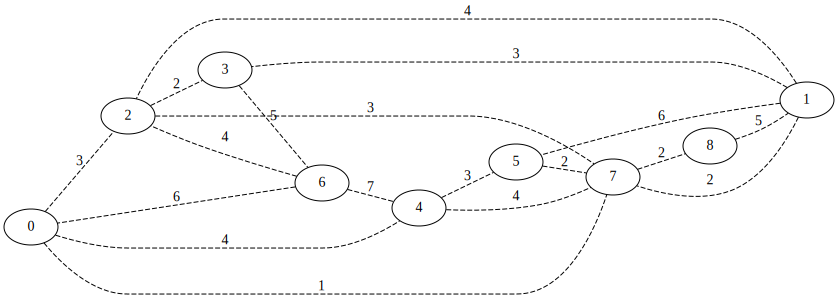

testing 0 - 7, weight 1
connect 0 - 7


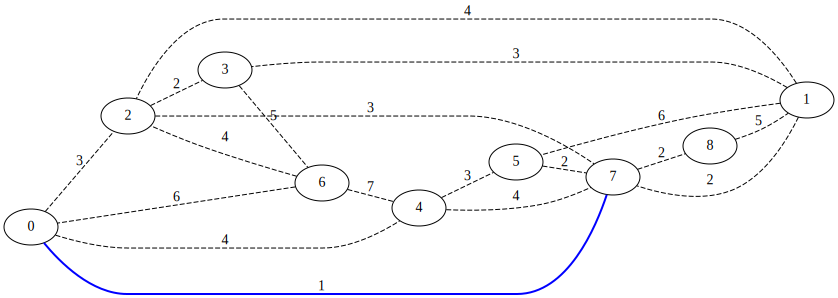

________________________________________________________________________________________________________________________
testing 1 - 7, weight 2
connect 1 - 7


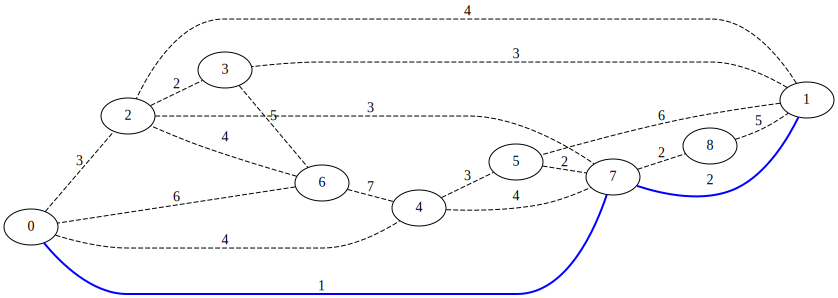

________________________________________________________________________________________________________________________
testing 2 - 3, weight 2
connect 2 - 3


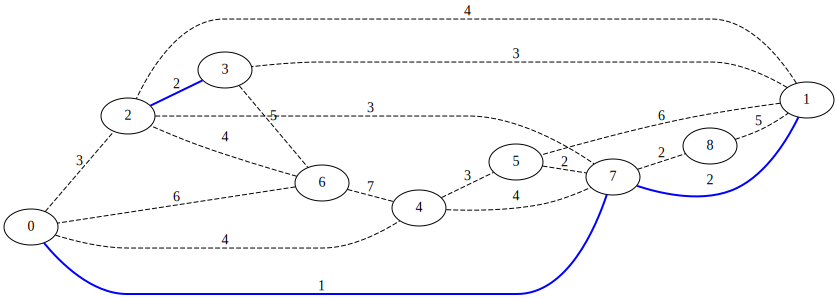

________________________________________________________________________________________________________________________
testing 5 - 7, weight 2
connect 5 - 7


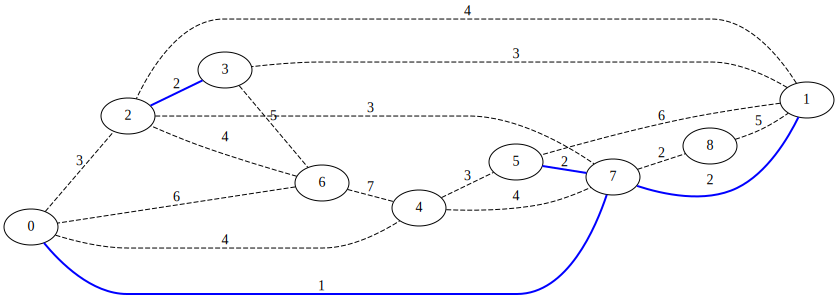

________________________________________________________________________________________________________________________
testing 7 - 8, weight 2
connect 7 - 8


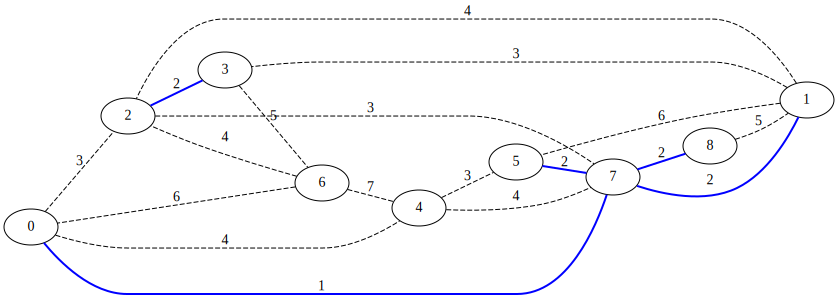

________________________________________________________________________________________________________________________
testing 0 - 2, weight 3
connect 0 - 2


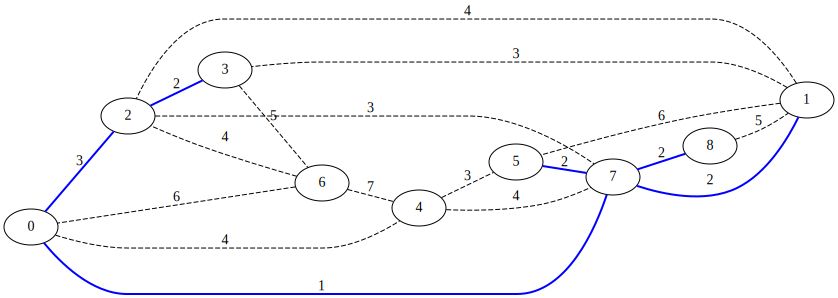

________________________________________________________________________________________________________________________
testing 1 - 3, weight 3
testing 2 - 7, weight 3
testing 4 - 5, weight 3
connect 4 - 5


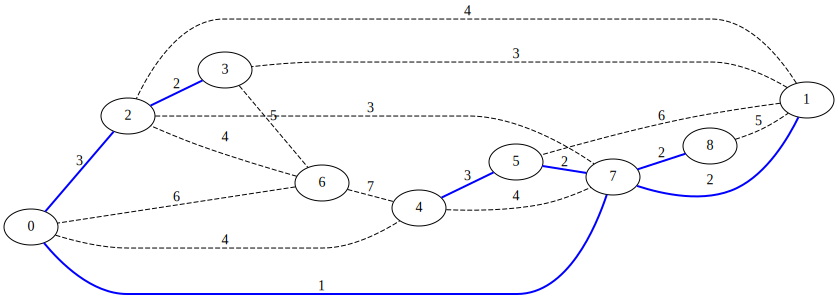

________________________________________________________________________________________________________________________
testing 0 - 4, weight 4
testing 1 - 2, weight 4
testing 4 - 7, weight 4
testing 6 - 2, weight 4
connect 6 - 2


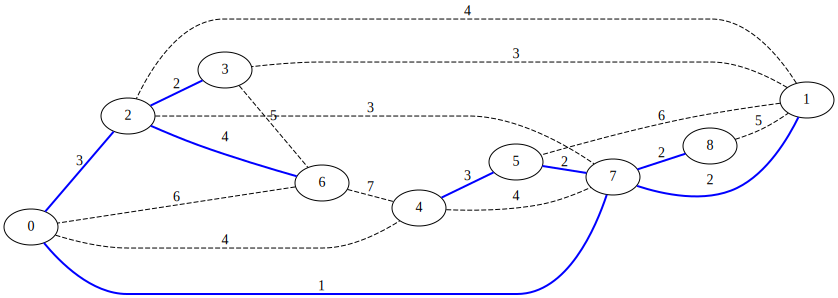

________________________________________________________________________________________________________________________
{(2, (7, 8)), (2, (5, 7)), (2, (1, 7)), (1, (0, 7)), (3, (0, 2)), (2, (2, 3)), (4, (6, 2)), (3, (4, 5))}


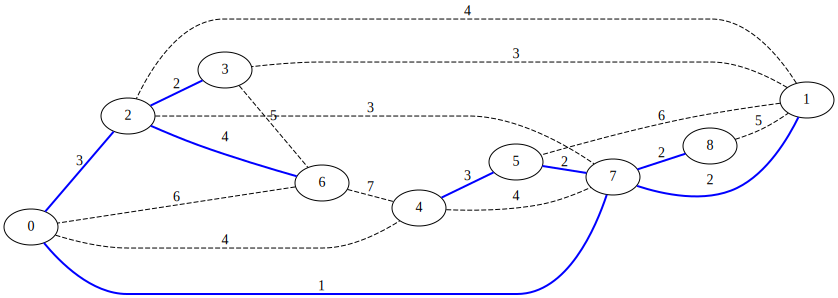

In [10]:
MST = demoFile('tiny.txt')
MST